In [449]:
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.layers import Dropout, Dense, Conv2D, AveragePooling2D, Flatten, MaxPooling2D
from keras.models import Sequential, load_model
from sklearn.metrics import accuracy_score

In [450]:
# Uploading train, data for prediction and sample submission file
train_data = pd.read_csv('train.csv')
prediction = pd.read_csv('test.csv')
submission1 = pd.read_csv('sample_submission.csv')

In [451]:
# Analysing train data
train_data.head()   # means a 28*28 image with numbers as label

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [452]:
# checking for any missiong values in training data
train_data.isnull().sum().sum()   # 0 missing values

0

In [453]:
# Splitting training set into initial training set and test set
train_data, test_data = train_test_split(train_data, stratify=train_data["label"], test_size = 0.20)

# Splitting initial training set into final training set and cross validation set
train_data, cv_data = train_test_split(train_data, stratify=train_data["label"], test_size = 0.25)
train_data.shape, test_data.shape, cv_data.shape

((25200, 785), (8400, 785), (8400, 785))

In [454]:
# Splitting the data into its label and features
train_y = train_data['label']
train_x = train_data.drop(columns = ['label'])
cv_y = cv_data['label']
cv_x = cv_data.drop(columns = ['label'])
test_y = test_data['label']
test_x = test_data.drop(columns = ['label'])

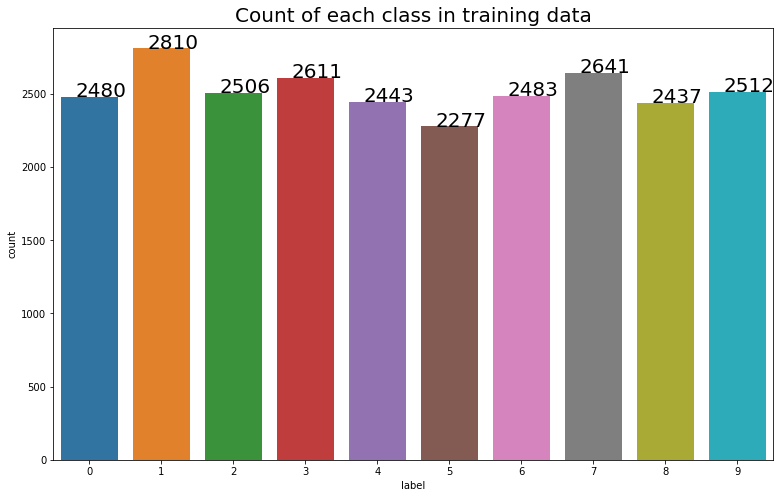

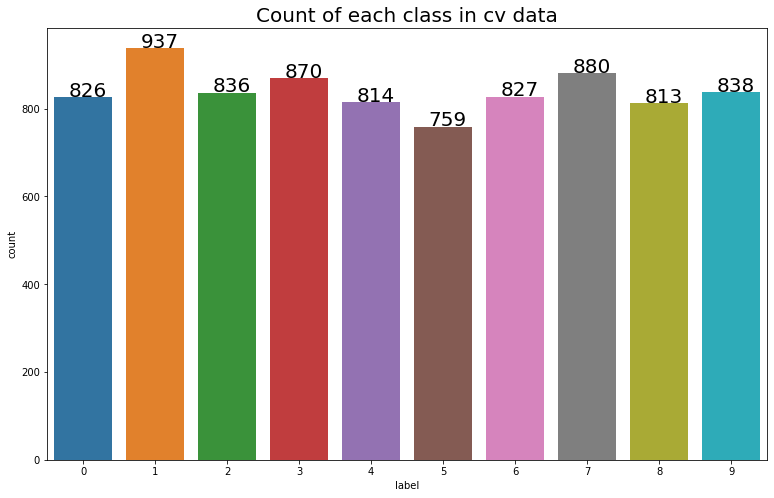

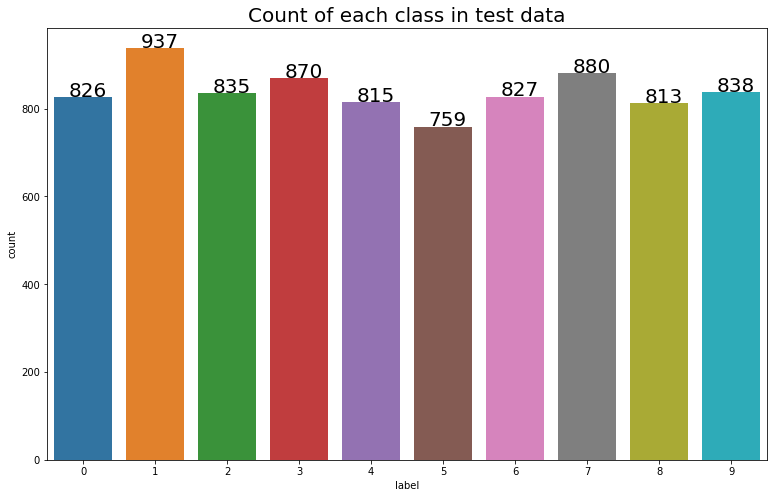

In [455]:
# Plotting the classification of each class in each dataset set

fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each class in training data", fontsize = 20)
sns.countplot(x = train_y)
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2, y = i.get_height()+1.5, s = str(i.get_height()), fontsize = 20, color = "black")
plt.show()   
#####################################################################################################################
fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each class in cv data", fontsize = 20)
sns.countplot(x = cv_y)
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2, y = i.get_height()+1.5, s = str(i.get_height()), fontsize = 20, color = "black")
plt.show() 
######################################################################################################################
fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each class in test data", fontsize = 20)
sns.countplot(x = test_y)
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2, y = i.get_height()+1.5, s = str(i.get_height()), fontsize = 20, color = "black")
plt.show() 

The label according to training data is 7


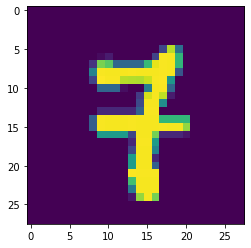

In [456]:
# Plotting a single training set to show how a training image looks like
x = np.array(train_x.iloc[0])
x = x.reshape(28,28)
plt.imshow(x)
print("The label according to training data is", train_y.iloc[0])   # As we can see that the image is same as label

In [457]:
# Changing the data into an array of pixels and labels so that it can be fed into the model expect test which is for prediction only
# Initially it was in the form of a DataFrame
train_x = np.array(train_x)
train_x = train_x.reshape(25200, 28, 28, 1)
train_y = np.array(pd.get_dummies(train_y))

cv_x = np.array(cv_x)
cv_x = cv_x.reshape(8400, 28, 28, 1)
cv_y = np.array(pd.get_dummies(cv_y))

# Changing the data into an array of pixels for test set
test_x = np.array(test_x)
test_x = test_x.reshape(8400, 28, 28, 1)

In [458]:
# Analyzing the data for prediction
prediction.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [459]:
# Checking for any missing values in prediction data
prediction.isnull().sum().sum()   # 0 missing values

0

In [460]:
# To predict on prediction data we need to convert the this data also into an array of features
prediction = np.array(prediction)
prediction = t.reshape(28000, 28, 28, 1)

In [461]:
# Defining a model consisting of convolutional layers, polling layers and fully connected layer
def model():
    model = Sequential()
    model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
    model.add(BatchNormalization())
    model.add(Conv2D(32,kernel_size=3,activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Conv2D(64,kernel_size=3,activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64,kernel_size=3,activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(10, activation='softmax')) 
    
    return model
model = model()
model.summary()    

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_7 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_8 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 12, 12, 32)        25632     
_________________________________________________________________
batch_normalization_9 (Batch (None, 12, 12, 32)        128       
_________________________________________________________________
dropout_21 (Dropout)         (None, 12, 12, 32)      

In [462]:
# Compiling and running the model
model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ["accuracy"])
hist = model.fit(train_x, train_y, validation_data=(cv_x, cv_y), epochs = 40)

Epoch 1/40
788/788 [==============================] - 106s 133ms/step - loss: 0.6769 - accuracy: 0.7946 - val_loss: 0.0656 - val_accuracy: 0.9792
Epoch 2/40
788/788 [==============================] - 105s 133ms/step - loss: 0.1053 - accuracy: 0.9701 - val_loss: 0.0506 - val_accuracy: 0.9855
Epoch 3/40
788/788 [==============================] - 104s 132ms/step - loss: 0.0798 - accuracy: 0.9757 - val_loss: 0.0509 - val_accuracy: 0.9848
Epoch 4/40
788/788 [==============================] - 104s 132ms/step - loss: 0.0611 - accuracy: 0.9822 - val_loss: 0.0431 - val_accuracy: 0.9869
Epoch 5/40
788/788 [==============================] - 103s 131ms/step - loss: 0.0497 - accuracy: 0.9834 - val_loss: 0.0341 - val_accuracy: 0.9879
Epoch 6/40
788/788 [==============================] - 103s 131ms/step - loss: 0.0440 - accuracy: 0.9853 - val_loss: 0.0453 - val_accuracy: 0.9865
Epoch 7/40
788/788 [==============================] - 104s 132ms/step - loss: 0.0459 - accuracy: 0.9853 - val_loss: 0.0422 -

In [463]:
# visualizing losses and accuracy with epochs 
epoch_number = []
for epoch in range(40):
    epoch_number.append(epoch + 1)
train_loss = hist.history['loss']
val_loss   = hist.history['val_loss']
train_acc  = hist.history['accuracy']
val_acc    = hist.history['val_accuracy']

In [464]:
# printing a table depicting the detail about the trained model
log_frame = pd.DataFrame(columns = ["Epoch", "Train_Loss", "Train_Accuracy", "CV_Loss", "CV_Accuracy"])
log_frame["Epoch"] = epoch_number
log_frame["Train_Loss"] = train_loss
log_frame["Train_Accuracy"] = train_acc
log_frame["CV_Loss"] = val_loss
log_frame["CV_Accuracy"] = val_acc 
log_frame

,Epoch,Train_Loss,Train_Accuracy,CV_Loss,CV_Accuracy
0,1,0.311683,0.904206,0.065569,0.979167
1,2,0.096527,0.972659,0.050640,0.985476
2,3,0.074495,0.977024,0.050925,0.984762
3,4,0.062695,0.981587,0.043103,0.986905
4,5,0.056478,0.982222,0.034118,0.987857
5,6,0.047599,0.984762,0.045296,0.986548
6,7,0.043190,0.986468,0.042180,0.987738
7,8,0.038873,0.988175,0.040391,0.988690
8,9,0.037688,0.988413,0.035845,0.989881
9,10,0.036219,0.988016,0.034099,0.989762


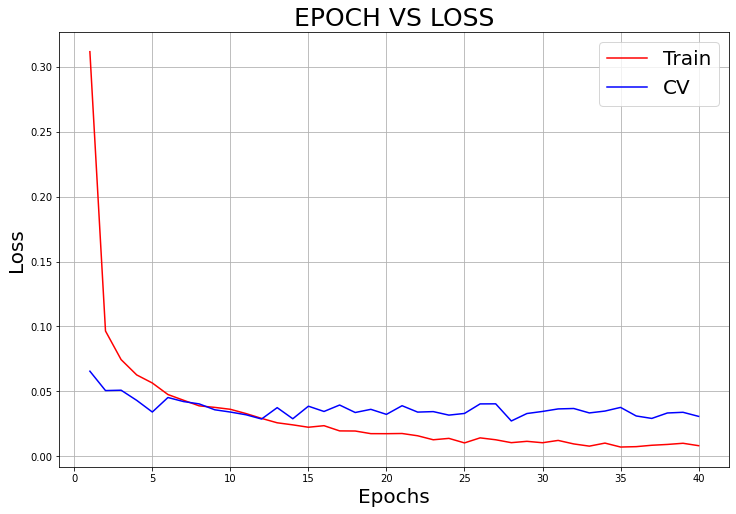

In [465]:
# plotting epoch vs loss
def plotting(epoch, train_loss, CV_loss, title):
    fig, axes = plt.subplots(1,1, figsize = (12, 8))
    axes.plot(epoch, train_loss, color = 'red', label = "Train")
    axes.plot(epoch, CV_loss, color = 'blue', label = "CV")
    axes.set_title(title, fontsize = 25)
    axes.set_xlabel("Epochs", fontsize = 20)
    axes.set_ylabel("Loss", fontsize = 20)
    axes.grid()
    axes.legend(fontsize = 20)

plotting(list(log_frame["Epoch"]), list(log_frame["Train_Loss"]), list(log_frame["CV_Loss"]), "EPOCH VS LOSS") 

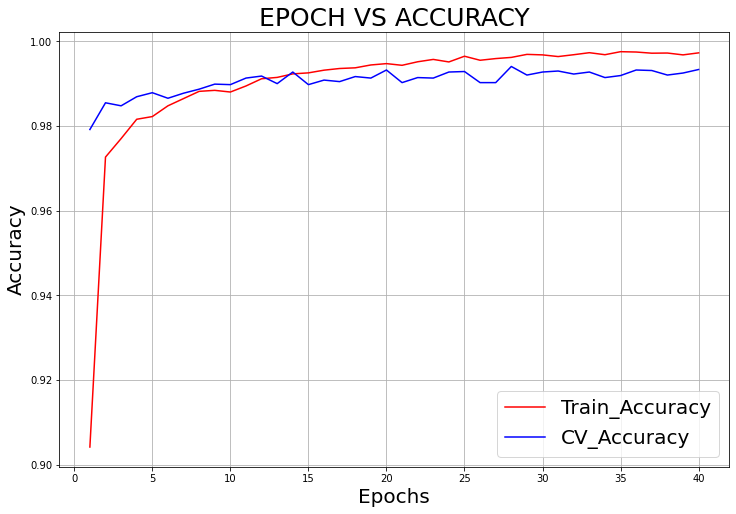

In [466]:
# plotting epoch vs accuracy
def plotting(epoch, train_acc, CV_acc, title):
    fig, axes = plt.subplots(1,1, figsize = (12, 8))
    axes.plot(epoch, train_acc, color = 'red', label = "Train_Accuracy")
    axes.plot(epoch, CV_acc, color = 'blue', label = "CV_Accuracy")
    axes.set_title(title, fontsize = 25)
    axes.set_xlabel("Epochs", fontsize = 20)
    axes.set_ylabel("Accuracy", fontsize = 20)
    axes.grid()
    axes.legend(fontsize = 20)

plotting(list(log_frame["Epoch"]), list(log_frame["Train_Accuracy"]), list(log_frame["CV_Accuracy"]), "EPOCH VS ACCURACY") 

In [467]:
# predicting on test data
test_predict = model.predict(test_x)

In [468]:
# Since the test_predict is in the form of dummy variable with the value of probability so we will convert it into categorical data
l = []
for i in range(test_predict.shape[0]):
  j = test_predict[i].argmax()
  l.append(j)
test_predict = pd.DataFrame(l)

In [469]:
# Accuracy on test data
acc = accuracy_score(test_y, l) * 100
acc

99.22619047619048

In [470]:
# Now prediction on data to be predicted
prediction_predict = model.predict(prediction)

In [471]:
# Since the prediction_predict is in the form of dummy variable with the value of probability so we will convert it into categorical data
l = []
for i in range(prediction_predict.shape[0]):
  j = prediction_predict[i].argmax()
  l.append(j)
submission2 = pd.DataFrame(l)  
submission2 = submission2.rename(columns = {0 : 'Label'})

In [473]:
# Dropping the falsely labelled column from Sample submission file and clubing it with the predicted file 
submission1.drop(columns = ['Label'], inplace = True)
submission = pd.concat([submission1, submission2], axis = 1)

In [474]:
# Final submission file
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


 The label predicted is  5


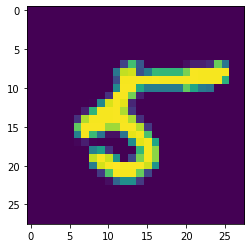

In [475]:
# Validation by image plotting
t = prediction.reshape(28000, 28, 28)
plt.imshow(t[2222])
print(" The label predicted is ", submission["Label"][2222])

In [476]:
# Saving the submission file
submission.to_csv('submission.csv')